In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing Dataset
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset = dataset.drop('Id',axis=1)

## Summary of Dataset

In [4]:
print 'Shape of Dataset: ',dataset.shape

Shape of Dataset:  (150, 5)


In [5]:
print 'More Info :'
print dataset.info()

More Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [6]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Class Distribution
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Visualizations

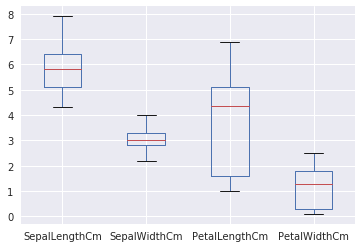

In [8]:
dataset.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f809fc53110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f809c231490>]], dtype=object)

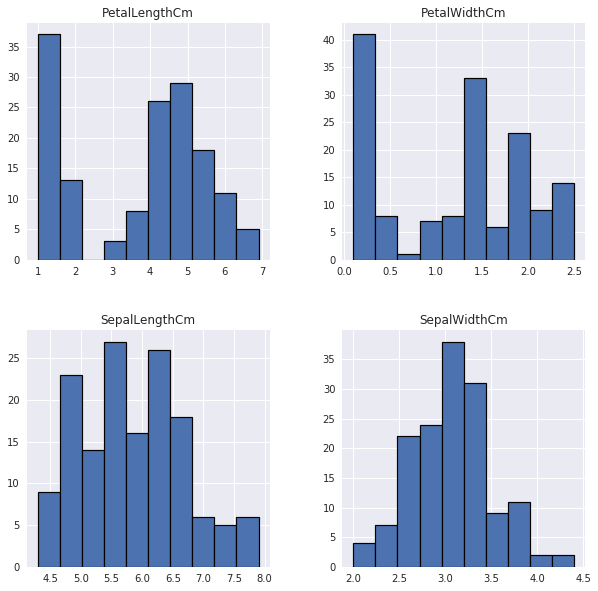

In [9]:
dataset.hist(edgecolor='black',linewidth=1.2,figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f809be00390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f809bfbb2d0>]], dtype=object)

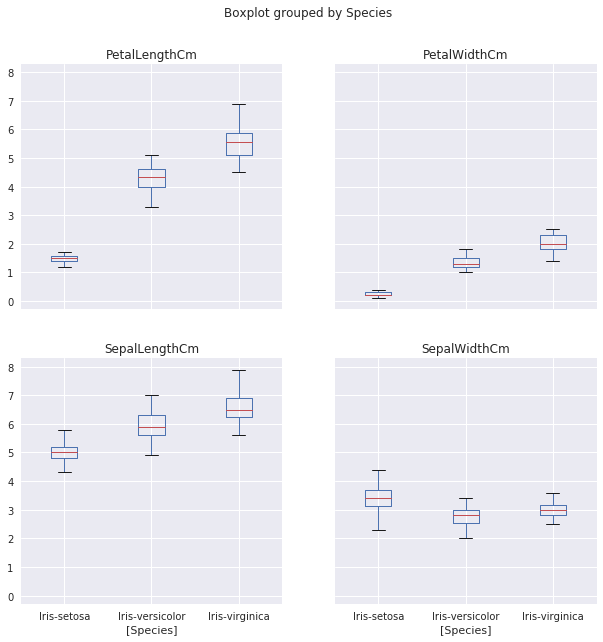

In [10]:
dataset.boxplot(by='Species',figsize=(10,10))

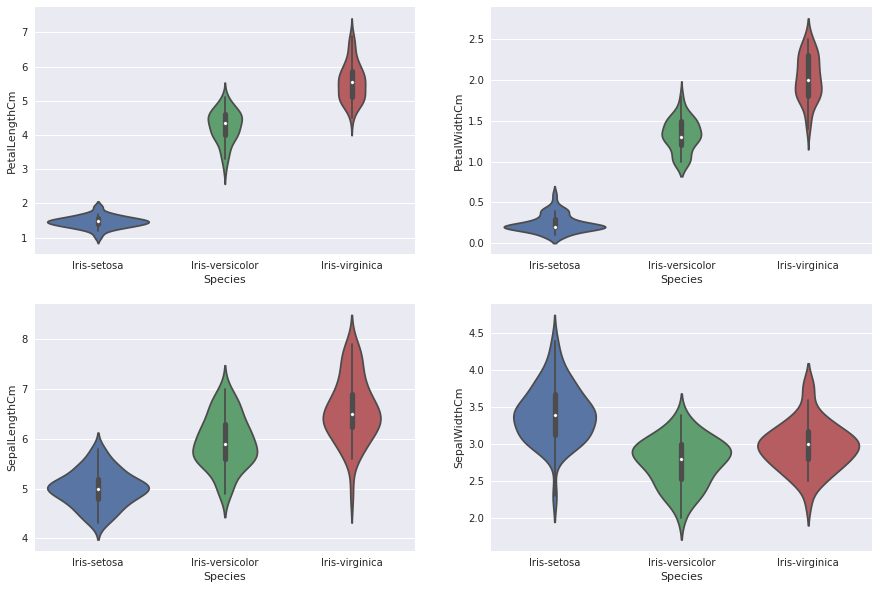

In [11]:
#Violinplots show density of length and widths within species
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=dataset)

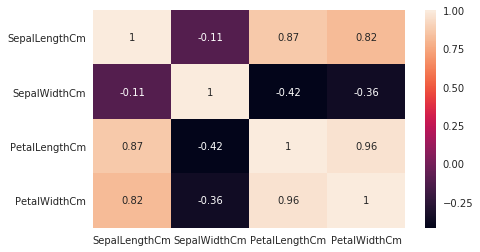

In [33]:
plt.figure(figsize=(7,4))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

Shows High Correlation between PetalWidth and PetalLength

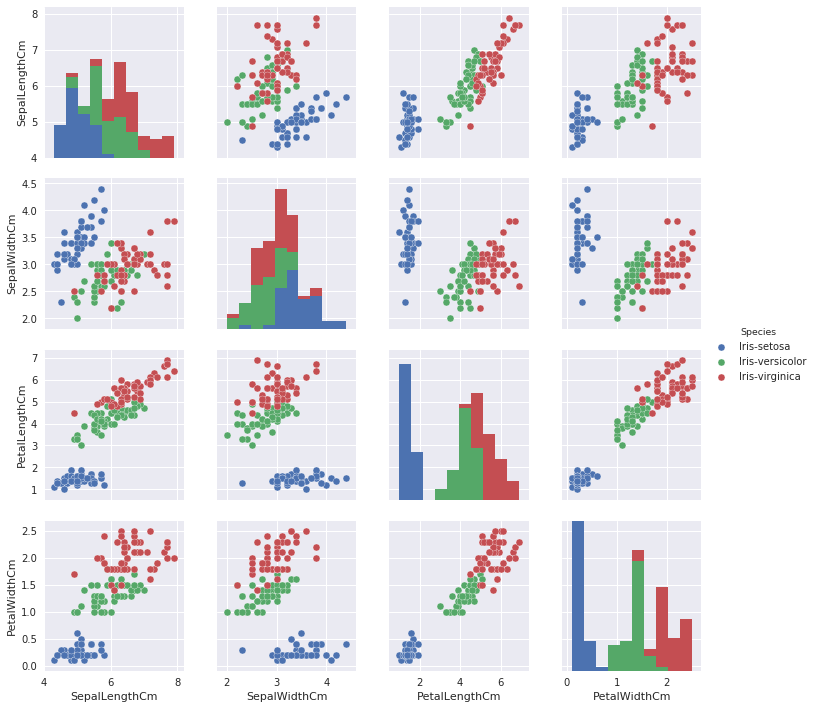

In [12]:
# Using Seaborn pairplot to see bivariate relationship between each pair of Feature
sns.pairplot(data=dataset, hue="Species")

Again Conforming the fact that Petal features are better than Sepal Features

## Applying Classification Models

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cross_validation import train_test_split

In [19]:
# Seperating Independent and Dependent Variables
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

In [27]:
def summary_reports(classifier, y_test, y_pred):
    print classification_report(y_test,y_pred)
    print confusion_matrix(y_test,y_pred)
    print 'Accuracy is: ', accuracy_score(y_pred,y_test)

In [28]:
# Summary of the predictions made by classifier
summary_reports(classifier, y_test, y_pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy is:  0.966666666667


### Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

#Summary of Predictions
summary_reports(classifier, y_test, y_pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy is:  0.966666666667


### Support Vector Machines

In [30]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

#Summary of predictions
summary_reports(classifier, y_test, y_pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is:  1.0


### K Nearest Neighbour

In [31]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

#Summary of predictions
summary_reports(classifier, y_test,y_pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is:  1.0


#### Checking Accuracy for Multiple values of k in kNN

([<matplotlib.axis.XTick at 0x7f80910389d0>,
 <a list of 10 Text xticklabel objects>)

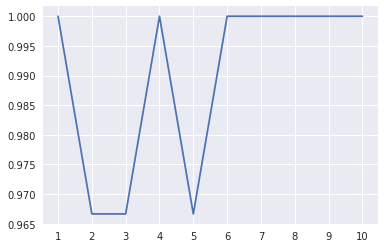

In [36]:
a_index = list(range(1,11))
a = pd.Series()
x =[1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    a = a.append(pd.Series(accuracy_score(y_pred,y_test)))

plt.plot(a_index,a)
plt.xticks(x)

### Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#Sumarry of predictions
summary_reports(classifier,y_test ,y_pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is:  1.0
